#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as stats
%matplotlib inline
import pylab, os, pydotplus, warnings, statsmodels.api as sm
import statsmodels.formula.api as smf, statsmodels.stats.api as sms, statsmodels.tsa.api as smt
warnings.filterwarnings('ignore')
from scipy import stats
from math import sqrt
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from mlxtend.feature_selection import sequential_feature_selector, SequentialFeatureSelector as sfs
from mlxtend.evaluate import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

C:\Users\gsati\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
d1=pd.read_csv('playTennis.csv')
d1.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [3]:
d1=d1.apply(preprocessing.LabelEncoder().fit_transform)
d1.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [4]:
X=d1.drop('Play Tennis',axis=1)
y=d1['Play Tennis']

### 1.5 Visualize the data:(countplot)

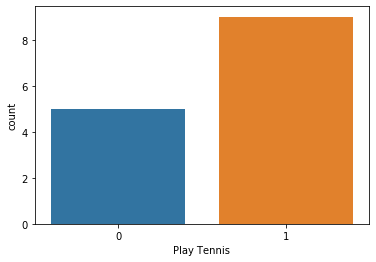

In [5]:
sns.countplot(d1['Play Tennis'])

### 1.6 Split the data into train and test set:(70/30)

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

### 1.7 Train a knn

In [7]:
knn=KNeighborsClassifier()

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 1.8 Predict the model:

In [9]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.6

### 1.9 Evaluation the model:(classification_report)

In [10]:
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [11]:
d2=pd.read_csv('pima-indians-diabetes-3.csv')
d2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Find out the feature columns

In [12]:
d2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 2.3 Extract the independent variable X and dependent variable Y?

In [13]:
X=d2.drop('Outcome',axis=1)
y=d2['Outcome']

### 2.4 Split the data into train and test set:(70/30)

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

### 2.5 Train a GaussianNB?

In [15]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [16]:
y_pred=gnb.predict(X_test)

### 2.7 Evaluation the model:(classification_report)

In [17]:
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



### 2.8 Conclusion:



### 2.9 Confusion matrix

In [18]:
# this produces a 2x2 numpy array (matrix)
cm=confusion_matrix(y_test,y_pred)
cm

array([[119,  32],
       [ 27,  53]])

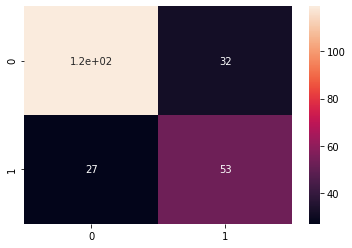

In [19]:
sns.heatmap(cm,annot=True)

### 2.10 what is Basic terminology For Confusion matrix?


True Positive (TP) : Observation is positive, and is predicted to be positive.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

* Falsely predict positive

Type I error

False Negative (FN) : Observation is positive, but is predicted negative.


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

In [39]:
print('True:', y_test.values[0:25])
print('Predicted:', y_pred[0:25])

True: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0]
Predicted: [0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1]


### 2.12 save confusion matrix and slice into four pieces

In [21]:
cm=confusion_matrix(y_test,y_pred)
print('TP:', cm[1,1])
print('TN:', cm[0,0])
print('FP:', cm[1,0])
print('FN:', cm[0,1])

TP: 53
TN: 119
FP: 27
FN: 32


### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [22]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.7445887445887446


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [23]:
print('Miscalculation error: ',1-accuracy_score(y_test,y_pred))

Miscalculation error:  0.2554112554112554


Sensitivity: When the actual value is positive, how often is the prediction correct?



In [24]:
print('Sensitivity: ',recall_score(y_test,y_pred))

Sensitivity:  0.6625


Specificity: When the actual value is negative, how often is the prediction correct?



In [25]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
specificity = TN / (TN + FP)
print('Specificity: ',specificity)

Specificity:  0.7880794701986755


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [26]:
print('False Positive rate: ',1 - specificity)

False Positive rate:  0.21192052980132448


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [40]:
print('Precision score:', precision_score(y_test,y_pred))

Precision score: 0.6235294117647059


### 2.14 Adjusting the classification threshold?

In [28]:
gnb.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### print the first 10 predicted responses?

In [29]:
gnb.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

#### print the first 10 predicted probabilities of class membership

In [30]:
gnb.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

#### print the first 10 predicted probabilities for class 1

In [31]:
a= gnb.predict_proba(X_test)
gnb.predict_proba(X_test)[0:10,1]

array([0.26184142, 0.05972106, 0.02757169, 0.17159931, 0.52846527,
       0.52725542, 0.00392295, 0.30074945, 0.46161883, 0.74995464])

#### store the predicted probabilities for class 1

In [32]:
class1 = gnb.predict_proba(X_test)[:,1]

#### plot histogram of predicted probabilities

#### create 8 bins

([array([38., 21., 11., 15.,  8., 16., 26., 96.]),
  array([96., 26., 16.,  8., 15., 11., 21., 38.])],
 array([7.27546266e-07, 1.25000546e-01, 2.50000364e-01, 3.75000182e-01,
        5.00000000e-01, 6.24999818e-01, 7.49999636e-01, 8.74999454e-01,
        9.99999272e-01]),
 <a list of 2 Lists of Patches objects>)

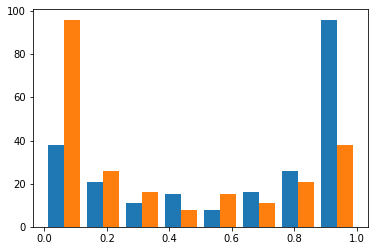

In [33]:
plt.hist(a, bins=8)

### print the first 10 predicted probabilities

In [34]:
a[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

### create new confusion matrix 

In [38]:
cm1 = confusion_matrix(y_test, class1, binary=True)
cm1

array([[151,   0],
       [ 80,   0]])

### 2.14 Receiver Operating Characteristic (ROC) Curves

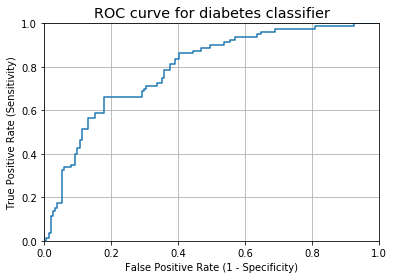

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, class1)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### define a function that accepts a threshold and prints sensitivity and specificity

In [44]:
def threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [46]:
threshold(0.5)

Sensitivity: 0.6625
Specificity: 0.8211920529801324


# 3. What is advantages Confusion matrix and ROC/AUC?

Confusion matrix advantages:

Allows you to calculate a variety of metrics

Useful for multi-class problems (more than two response classes)

ROC/AUC advantages:

Does not require you to set a classification threshold

Still useful when there is high class imbalance